<a href="https://colab.research.google.com/github/GiuseppeELio/FRESCO-Board/blob/main/FRESCO_Tdrop_PCool_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following code allows plotting the Data extracted from FRESCO (SD card) and to display the main panels for a Passive Raditive Cooling material(s) analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from tqdm import tqdm
import glob

csvname = glob.glob('*.txt')[0] # from the SD card

df = pd.read_csv(csvname, header=0, index_col=0, skipinitialspace=True, parse_dates=True, dayfirst=True)
pd.to_datetime(df.index)
df.describe()

,TA1,H1,TA2,H2,TA3,H3,TS1,TS2,TS3,TS4,Tbx,Tbr,Ir,TAIR,TSIR,PD0,T0,PD3,T3,Tset1
count,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000
mean,20.213838,55.726496,20.975351,53.761187,21.391861,51.628141,18.336491,18.550418,20.194985,19.431538,22.891853,31.718323,187.422909,21.177973,-5.960165,55.359552,21.171553,48.168864,21.040504,20.213046
std,6.134752,13.473098,6.841419,17.496464,8.523266,9.935291,8.627577,8.676702,9.141799,8.662744,8.512466,6.665411,215.632415,8.074063,3.939520,46.095311,7.624150,39.882928,7.392982,6.135857
min,10.700000,30.300000,10.900000,22.900000,9.400000,33.400000,6.370000,6.480000,7.720000,7.510000,10.270000,21.750000,0.000000,9.310000,-14.250000,0.000000,10.370000,0.000000,10.370000,0.000000
25%,14.800000,43.400000,14.700000,38.200000,13.700000,41.700000,11.080000,11.180000,12.380000,11.980000,15.080000,26.190000,0.000000,14.170000,-9.570000,0.000000,14.580000,0.000000,14.590000,14.800000
50%,19.200000,57.300000,19.700000,54.300000,19.100000,53.500000,15.080000,15.380000,16.880000,16.780000,21.190000,30.000000,21.550000,18.810000,-5.890000,65.570000,19.250000,61.200000,19.190000,19.200000
75%,25.400000,67.200000,27.000000,68.700000,29.300000,60.800000,26.290000,26.710000,28.910000,27.540000,31.060000,36.380000,420.820000,28.830000,-2.630000,95.020000,27.750000,81.260000,27.660000,25.400000
max,31.900000,80.300000,34.200000,88.000000,37.400000,67.100000,35.740000,35.850000,38.310000,36.890000,38.780000,51.560000,608.090000,37.750000,8.750000,221.080000,37.010000,347.430000,35.970000,31.900000


In [2]:
def export_figure(fig, fname, dpi=120, transparent=False):
    """Save figure as PNG or SVG with optional transparency"""
    fig.set_size_inches(16, 12)
    if transparent:
        # For PNG format with transparency
        if fname.endswith('.png'):
            fig.savefig(fname, bbox_inches='tight', dpi=dpi, transparent=True)
            # Convert PNG to RGBA and save again to preserve transparency
            im = Image.open(fname)
            im2 = im.convert('RGBA')
            im2.save(fname, format='PNG')
        # For SVG format with transparency
        elif fname.endswith('.svg'):
            fig.savefig(fname, bbox_inches='tight', dpi=dpi, transparent=True)
    else:
        fig.savefig(fname, bbox_inches='tight', dpi=dpi)

The following lines allows rolling every a certain time (e.g. 1 hour) the entire dataset and in case save the new dataset as csv.

In [3]:
rw = '1H'
dfroll = df.rolling(window=rw).mean()
pd.set_option('plotting.backend', 'matplotlib')
dfroll.describe()
#dfroll.to_csv(csvname[:-4] + f'_rw{rw}.csv', decimal=',', sep=';', float_format='%.3f')

,TA1,H1,TA2,H2,TA3,H3,TS1,TS2,TS3,TS4,Tbx,Tbr,Ir,TAIR,TSIR,PD0,T0,PD3,T3,Tset1
count,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000,161540.000000
mean,20.245182,55.631743,21.003802,53.646353,21.431629,51.545619,18.386452,18.603074,20.244851,19.475746,22.913555,31.669225,187.571536,21.215809,-5.906127,55.361443,21.212095,48.170630,21.085732,20.240102
std,6.113002,13.423565,6.819726,17.433236,8.507036,9.933102,8.607858,8.661899,9.121718,8.645884,8.474064,6.536577,213.812266,8.043943,3.849812,43.761349,7.604164,37.200663,7.377894,6.112687
min,10.928909,31.165614,11.009116,23.827001,9.519010,33.818884,6.896708,7.210652,8.225037,7.879752,10.727220,23.428711,0.000000,9.881991,-13.089325,0.000000,10.641159,0.000000,10.681822,0.000000
25%,14.778001,43.399599,14.722055,38.433315,13.730011,41.509624,11.087491,11.254684,12.414120,12.093440,14.988867,26.344378,0.000000,14.140759,-9.485449,0.000006,14.536665,0.000000,14.574625,14.777052
50%,19.332151,57.062056,19.747117,53.796224,19.232807,53.237905,15.163916,15.478181,17.018279,16.727721,21.118910,30.030197,37.116497,18.902905,-5.827800,71.900076,19.291983,61.008305,19.302162,19.329730
75%,25.549015,67.192383,27.011597,68.760823,29.142378,60.799115,26.411266,26.739889,28.739659,27.469124,31.083585,35.877717,419.903880,28.760238,-2.489176,90.543132,27.587476,79.045184,27.619817,25.548044
max,31.571477,79.184862,33.901578,85.145189,36.951184,66.415541,35.153832,35.559420,37.399133,36.358451,37.752468,48.444904,552.368170,36.089448,5.070000,135.081487,36.349449,111.977448,35.697527,31.572492


In [4]:
# the differences between the sample and the ambient temperature measured using the sensor related to the  TA1 data collection
dfroll['ΔT1'] = dfroll['TS1'] - dfroll['TA1']
dfroll['ΔT2'] = dfroll['TS2'] - dfroll['TA1']
dfroll['ΔT3'] = dfroll['TS3'] - dfroll['TA1']
dfroll['ΔT4'] = dfroll['TS4'] - dfroll['TA1']
dfroll['ΔTbx'] = dfroll['Tbx'] - dfroll['TA1']

#If need for example you can do the same considering another temperature measured inside the sample box holder (e.g. TA3)
#dfroll['ΔT1_box'] = dfroll['TS1'] - dfroll['TA3']
#dfroll['ΔT2_box'] = dfroll['TS2'] - dfroll['TA3']
#dfroll['ΔT3_box'] = dfroll['TS3'] - dfroll['TA3']
#dfroll['ΔT4_box'] = dfroll['TS4'] - dfroll['TA3']
#dfroll['ΔTbx_box'] = dfroll['TS4'] - dfroll['Tbx']

#And then consider the differce between two possible "relative ambient temperatures"
#dfroll['ΔT_box'] = dfroll['TA3'] - dfroll['TA1']

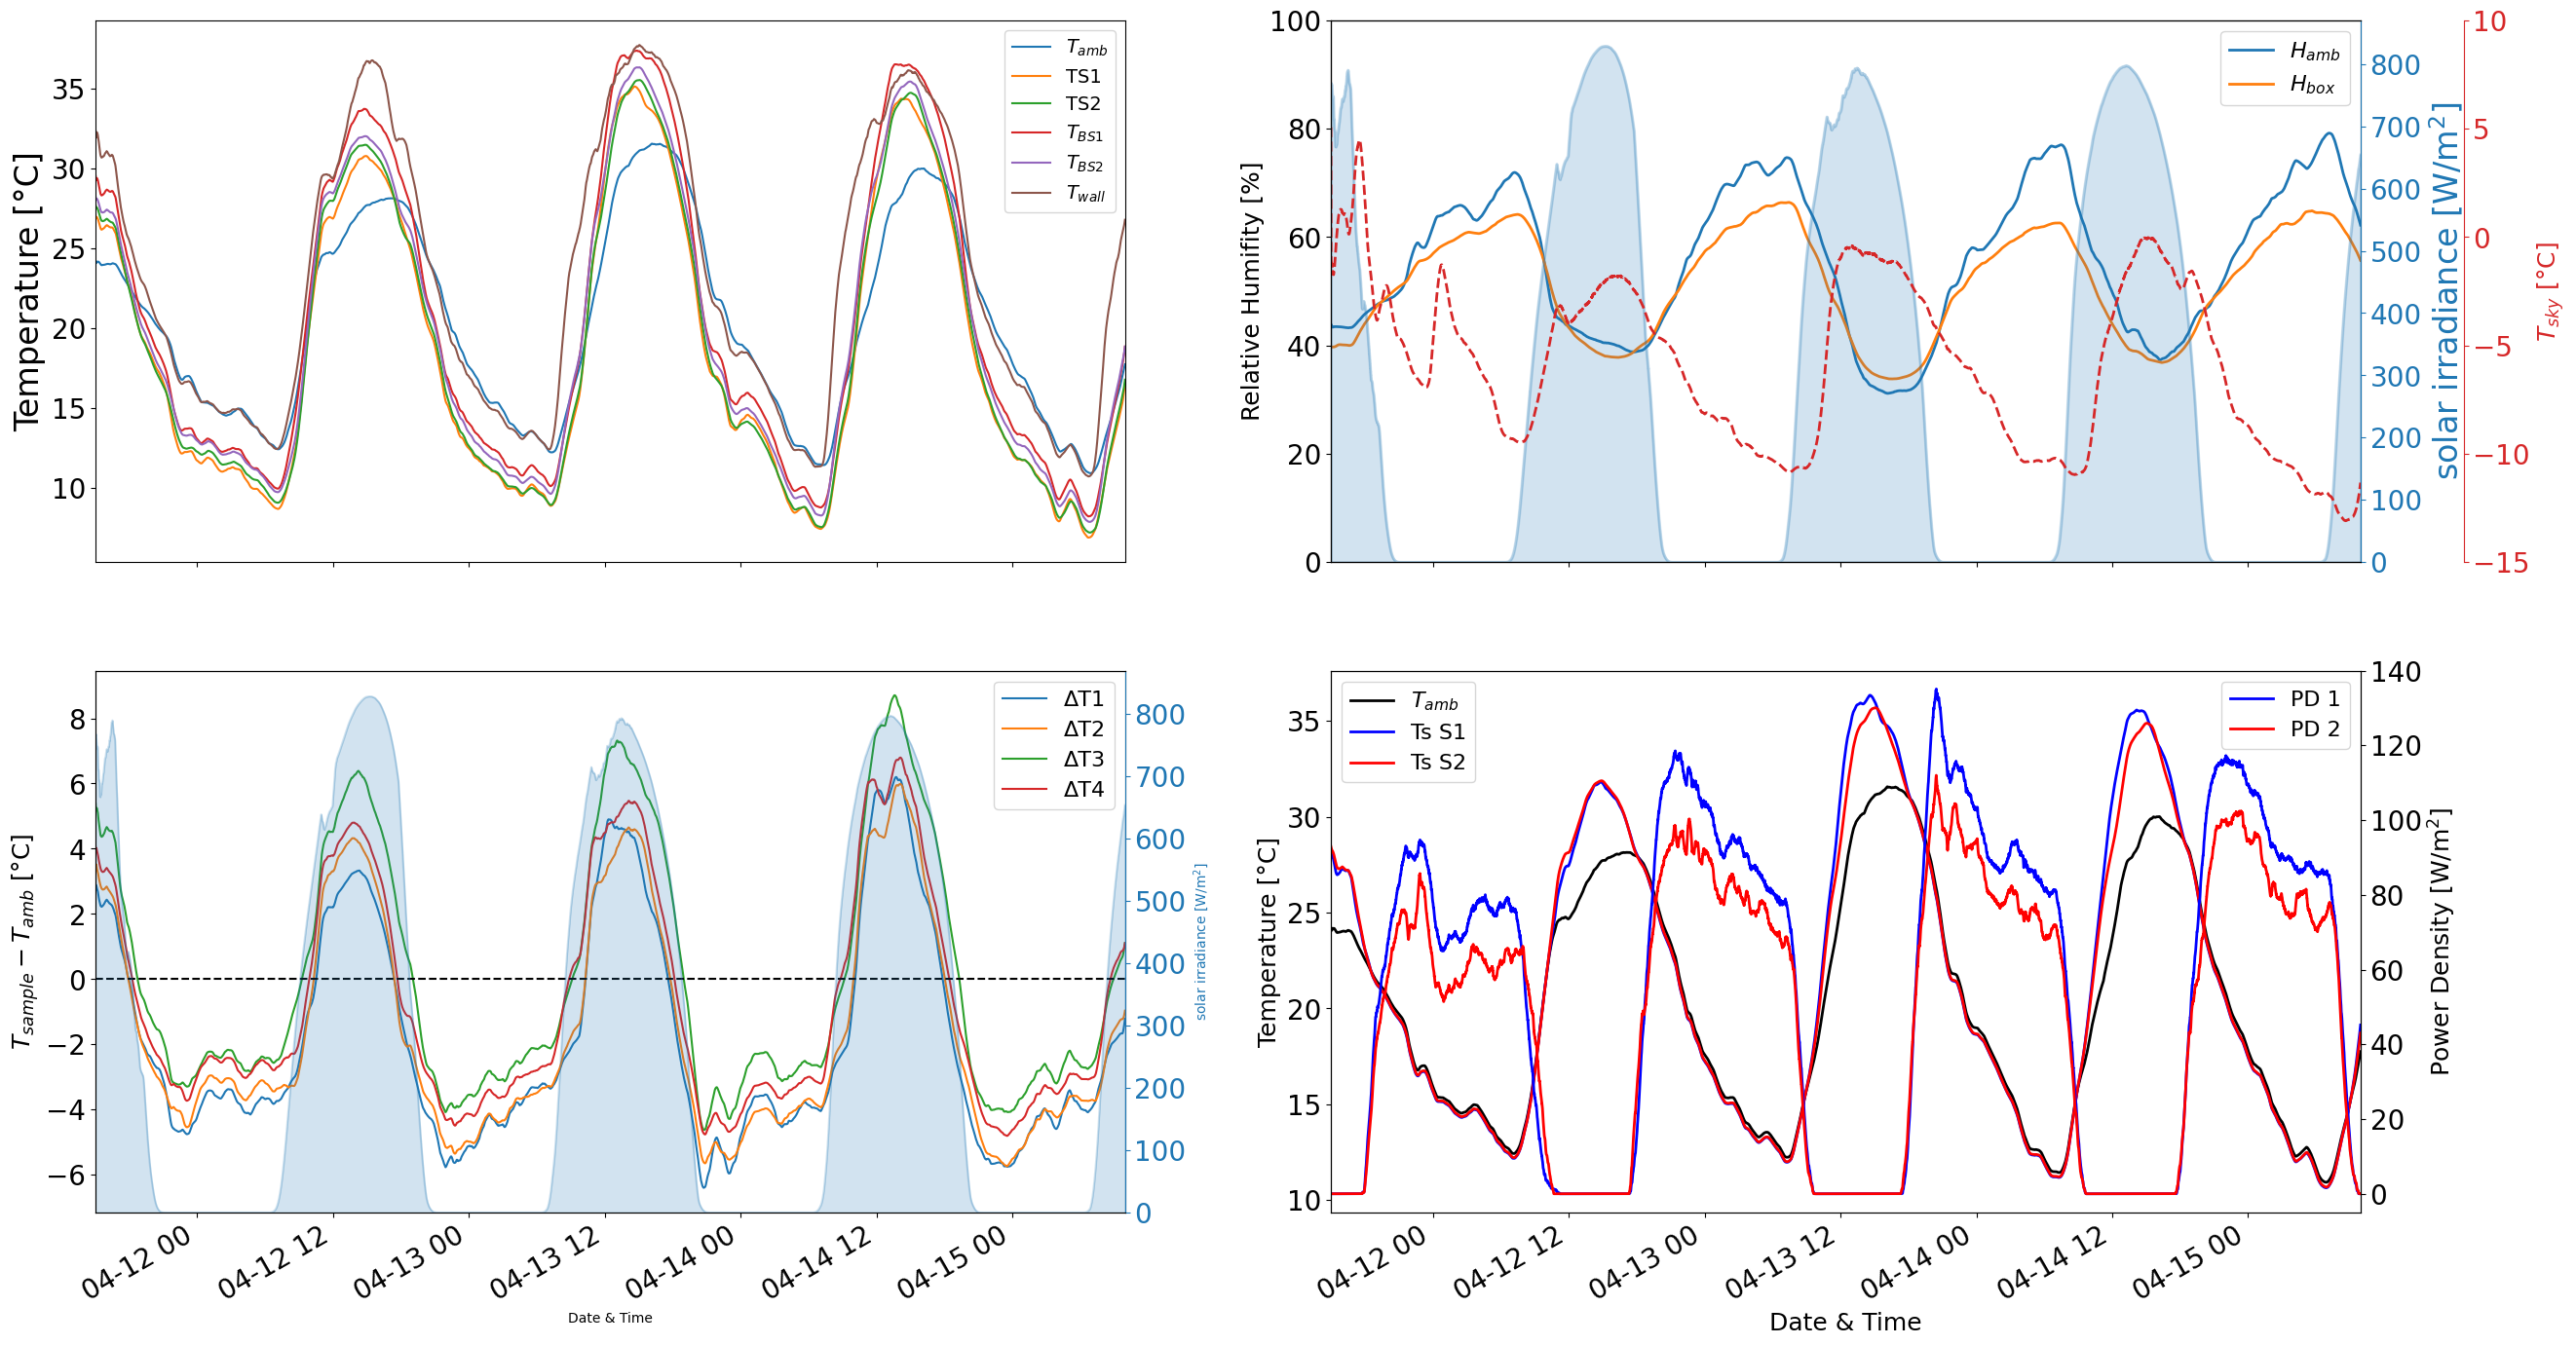

In [6]:
import matplotlib.pyplot as plt
fontsize = 24
fontax = fontsize-6
fontlab = fontsize - 8
# If needed you can adjust some value such as the irradiance if you system results not well alligned with a weather station
dfroll['Irm'] = dfroll['Ir'] * 1.5

fig, axarr = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(30,18))
#First Plot
dfroll.plot(ax=axarr[0, 0], y=['TA1', 'TS1', 'TS2', 'TS3', 'TS4', 'Tbx'])
axarr[0, 0].legend(['$T_{amb}$', 'TS1', 'TS2', '$T_{BS1}$', '$T_{BS2}$', '$T_{wall}$'], fontsize=fontsize-10, loc='upper right', ncol=1)
axarr[0, 0].set_ylabel('Temperature [°C]', fontsize=fontsize)

#Second Plot
ax_irr = axarr[0, 1].twinx()
dfroll.plot(ax=axarr[0, 1], y=['H1', 'H3'], ylim=(0, 100), linewidth=2.0, color=['tab:blue', 'tab:orange', 'black'])
axarr[1, 1].set_xlabel('Date & Time')

dfroll.plot.area(ax=ax_irr, y='Irm', alpha=0.2, legend=False, linewidth=2.0)
ax_irr.set_ylabel('solar irradiance [W/m$^2$]', color='#1f77b4', fontsize=fontsize)
ax_irr.spines['right'].set_color('#1f77b4')
ax_irr.tick_params(axis='y', colors='#1f77b4')
axarr[0, 1].legend(['$T_{amb}$', '$T_{box}$'], fontsize=fontlab)
axarr[0, 1].legend(['$H_{amb}$', '$H_{box}$', '$H_{SS3}$'], fontsize=fontlab)
axarr[0, 1].set_ylabel('Temperature [°C]', fontsize=fontax)
axarr[0, 1].set_ylabel('Relative Humifity [%]', fontsize=fontax)

ax_sky = axarr[0, 1].twinx()
dfroll.plot(ax=ax_sky, y='TSIR', ylim=(-15, 10), color='#d62728', legend=False, linewidth=2.0, linestyle='--')
ax_sky.set_ylabel('$T_{sky}$ [°C]', color='#d62728', fontsize=fontax)
ax_sky.spines['right'].set_color('#d62728')
ax_sky.spines['right'].set_position(("axes", 1.1))
ax_sky.tick_params(axis='y', colors='#d62728')

#Third Plot
ax_dif = axarr[1, 0].twinx()
dfroll.plot(ax=axarr[1, 0], y=['ΔT1', 'ΔT2','ΔT3','ΔT4'])
dfroll.plot.area(ax=ax_dif, y='Irm', alpha=0.2, legend=False)
axarr[1, 0].axhline(0, ls='--', c='k')
axarr[1, 0].set_ylabel('$T_{sample} - T_{amb}$ [°C]', fontsize=fontax)
ax_dif.set_ylabel('solar irradiance [W/m$^2$]', color='#1f77b4')
axarr[1, 0].legend(['ΔT1', 'ΔT2','ΔT3','ΔT4'], fontsize=fontlab, loc='upper right')
ax_dif.spines['right'].set_color('#1f77b4')
ax_dif.tick_params(axis='y', colors='#1f77b4')

#Fourth Plot
dfroll.plot(ax=axarr[1, 1], y=['TA1', 'T0', 'T3'], linewidth=2.0, color=['black', 'blue', 'red'])
axarr[1, 1].set_ylabel('Temperature [°C]', fontsize=fontax)

ax_pow = axarr[1, 1].twinx()
dfroll.plot(ax=ax_pow, y=['PD0', 'PD3'], linewidth=2.0, color=['blue', 'red'])
plt.ylim(-5, 140)
axarr[1, 1].legend(['$P_1$', '$P_2$'], fontsize=fontlab)
axarr[1, 1].set_xlabel('Date & Time', fontsize=fontax)
ax_pow.set_ylabel('Power Density [W/m$^2$]', fontsize=fontax)

axarr[1, 1].legend(['$T_{amb}$', 'Ts S1', 'Ts S2'], fontsize=fontlab, loc='upper left')
ax_pow.legend(['PD 1', 'PD 2'], fontsize=fontlab, loc='upper right')

# Increase font size for tick labels
for ax_row in axarr:
    for ax in ax_row:
        ax.tick_params(axis='both', which='major', labelsize=fontsize-4)
        ax_sky.tick_params(axis='both', which='major', labelsize=fontsize-4)
        ax_irr.tick_params(axis='both', which='major', labelsize=fontsize-4)
        ax_dif.tick_params(axis='both', which='major', labelsize=fontsize-4)
        ax_pow.tick_params(axis='both', which='major', labelsize=fontsize-4)

_ = [axh.autoscale(enable=True, axis='x', tight=True) for axh_row in axarr for axh in axh_row]



#export_figure(fig, csvname[:-4] + '_Tdrop_PCool.png')
# Save the figure as SVG
#export_figure(fig, csvname[:-4] + 'Tdrop_PCool.svg', transparent=True)